In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from vega_datasets import data

# Question Set 1

In [2]:
temps = data.sf_temps()
temps.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


## Exercise 1
Resample by the day and take the average temperature. Visualize the average temperature over time.

In [3]:
#setting the date as the index
temps = temps.set_index('date').sort_index()

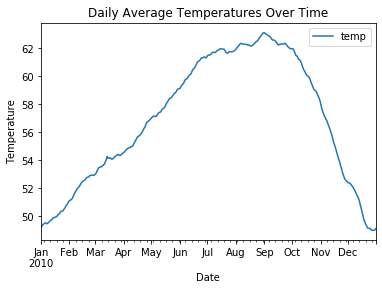

In [4]:
temps.resample('D').mean().plot()
plt.title('Daily Average Temperatures Over Time')
plt.ylabel('Temperature')
plt.xlabel('Date')
plt.show()

## Exercise 2
Write the code necessary to visualize the minimum temperature over time.

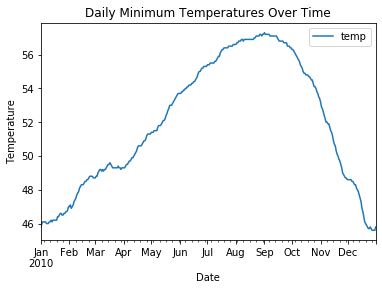

In [5]:
temps.resample('D').min().plot()
plt.title('Daily Minimum Temperatures Over Time')
plt.ylabel('Temperature')
plt.xlabel('Date')
plt.show()

## Exercise 3
Write the code necessary to visualize the maximum temperature over time.

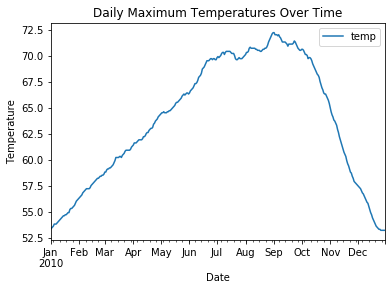

In [6]:
temps.resample('D').max().plot()
plt.title('Daily Maximum Temperatures Over Time')
plt.ylabel('Temperature')
plt.xlabel('Date')
plt.show()

## Exercise 4
Which month is the coldest, on average?

In [7]:
temps.resample('M').mean().idxmin()

temp   2010-01-31
dtype: datetime64[ns]

In [8]:
temps.resample('M').mean()

,temp
date,
2010-01-31,49.984140
2010-02-28,52.243899
2010-03-31,53.956528
2010-04-30,55.633056
2010-05-31,57.970968
2010-06-30,60.444722
2010-07-31,61.765457
2010-08-31,62.405376
2010-09-30,62.487083


- January is the coldest month on average by half a degrees.

## Exercise 5
Which month has the highest average temperature?

In [9]:
temps.resample('M').mean().idxmax()

temp   2010-09-30
dtype: datetime64[ns]

In [10]:
temps.resample('M').mean()

,temp
date,
2010-01-31,49.984140
2010-02-28,52.243899
2010-03-31,53.956528
2010-04-30,55.633056
2010-05-31,57.970968
2010-06-30,60.444722
2010-07-31,61.765457
2010-08-31,62.405376
2010-09-30,62.487083


- September is the hottest month on average, barely beating out August.

## Exercise 6
Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [11]:
min_max_temps = temps.resample('D')['temp'].agg(['min', 'max'])
min_max_temps['variability'] = (min_max_temps['max']) - (min_max_temps['min'])

In [12]:
min_max_temps.variability.idxmax()

Timestamp('2010-08-31 00:00:00', freq='D')

In [13]:
min_max_temps.variability.max()

15.0

- August has the highest daily temperature variability.

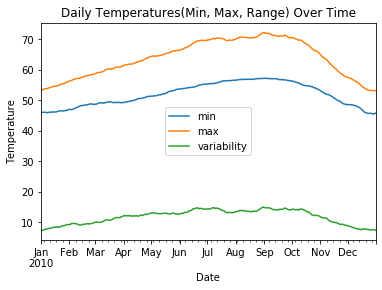

In [14]:
min_max_temps.plot()
plt.title('Daily Temperatures(Min, Max, Range) Over Time')
plt.ylabel('Temperature')
plt.xlabel('Date')
plt.show()

## Bonus: 
Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

In [15]:
bonus = temps.resample('D')['temp'].agg(['min', 'max', 'mean'])

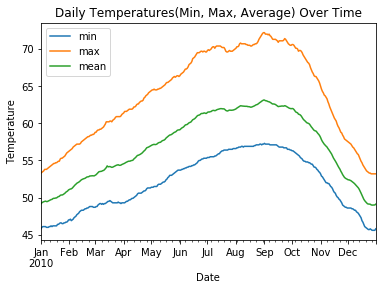

In [16]:
bonus.plot()
plt.title('Daily Temperatures(Min, Max, Average) Over Time')
plt.ylabel('Temperature')
plt.xlabel('Date')
plt.show()

# Question Set 2

In [17]:
from vega_datasets import data

In [18]:
seattle = data.seattle_weather()
seattle = seattle.set_index('date').sort_index()
seattle

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...
2015-12-27,8.6,4.4,1.7,2.9,fog
2015-12-28,1.5,5.0,1.7,1.3,fog
2015-12-29,0.0,7.2,0.6,2.6,fog


## Exercise 1
Which year and month combination has the highest amount of precipitation?

In [65]:
seattle.resample('M').precipitation.sum().idxmax()

Timestamp('2015-12-31 00:00:00', freq='M')

In [66]:
seattle.resample('M').precipitation.sum()

date
2012-01-31    173.3
2012-02-29     92.3
2012-03-31    183.0
2012-04-30     68.1
2012-05-31     52.2
2012-06-30     75.1
2012-07-31     26.3
2012-08-31      0.0
2012-09-30      0.9
2012-10-31    170.3
2012-11-30    210.5
2012-12-31    174.0
2013-01-31    105.7
2013-02-28     40.3
2013-03-31     69.7
2013-04-30    149.6
2013-05-31     60.5
2013-06-30     33.1
2013-07-31      0.0
2013-08-31     34.4
2013-09-30    156.8
2013-10-31     39.2
2013-11-30     96.3
2013-12-31     42.4
2014-01-31     94.0
2014-02-28    155.2
2014-03-31    240.0
2014-04-30    106.1
2014-05-31     80.0
2014-06-30     18.8
2014-07-31     19.6
2014-08-31     46.0
2014-09-30     56.7
2014-10-31    171.5
2014-11-30    123.1
2014-12-31    121.8
2015-01-31     93.0
2015-02-28    134.2
2015-03-31    113.5
2015-04-30     51.6
2015-05-31     14.8
2015-06-30      5.9
2015-07-31      2.3
2015-08-31     83.3
2015-09-30     21.1
2015-10-31    122.4
2015-11-30    212.6
2015-12-31    284.5
Freq: M, Name: precipitation, dtype

- December of 2015 had the highest amount of precipitation.

## Exercise 2
Visualize the amount of monthly precipitation over time.

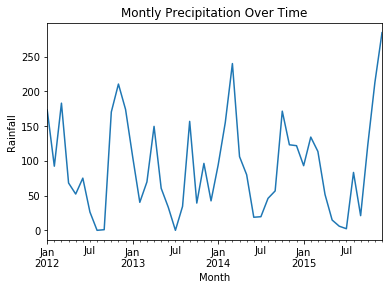

In [21]:
seattle.resample('M').precipitation.sum().plot()
plt.title('Montly Precipitation Over Time')
plt.ylabel('Rainfall')
plt.xlabel('Month')
plt.show()

## Exercise 3
Visualize the amount of wind over time. Choose a time interval you think is appropriate.

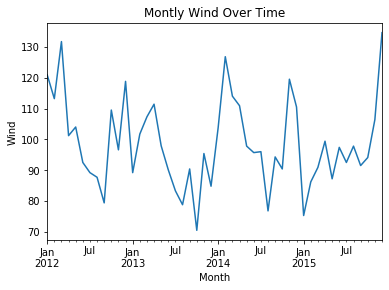

In [22]:
seattle.resample('M').wind.sum().plot()
plt.title('Montly Wind Over Time')
plt.ylabel('Wind')
plt.xlabel('Month')
plt.show()

## Exercise 4
Which year-month combination is the windiest?

In [67]:
seattle.resample('M').wind.mean().idxmax()

Timestamp('2014-02-28 00:00:00', freq='M')

In [68]:
seattle.resample('M').wind.mean()

date
2012-01-31    3.900000
2012-02-29    3.903448
2012-03-31    4.248387
2012-04-30    3.373333
2012-05-31    3.354839
2012-06-30    3.083333
2012-07-31    2.877419
2012-08-31    2.829032
2012-09-30    2.646667
2012-10-31    3.532258
2012-11-30    3.220000
2012-12-31    3.832258
2013-01-31    2.877419
2013-02-28    3.632143
2013-03-31    3.461290
2013-04-30    3.713333
2013-05-31    3.158065
2013-06-30    3.003333
2013-07-31    2.687097
2013-08-31    2.541935
2013-09-30    3.013333
2013-10-31    2.274194
2013-11-30    3.180000
2013-12-31    2.735484
2014-01-31    3.348387
2014-02-28    4.528571
2014-03-31    3.677419
2014-04-30    3.696667
2014-05-31    3.154839
2014-06-30    3.190000
2014-07-31    3.096774
2014-08-31    2.477419
2014-09-30    3.143333
2014-10-31    2.916129
2014-11-30    3.983333
2014-12-31    3.564516
2015-01-31    2.429032
2015-02-28    3.078571
2015-03-31    2.932258
2015-04-30    3.313333
2015-05-31    2.812903
2015-06-30    3.246667
2015-07-31    2.983871
2015-0

- February of 2014 had the highest amount of wind.

## Exercise 5
What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [25]:
(seattle[seattle.weather == 'sun']).weather.resample('M').count()

date
2012-01-31     4
2012-02-29     8
2012-03-31     6
2012-04-30     8
2012-05-31    14
2012-06-30    10
2012-07-31    12
2012-08-31    24
2012-09-30    18
2012-10-31    11
2012-11-30     2
2012-12-31     1
2013-01-31     6
2013-02-28     2
2013-03-31     9
2013-04-30    14
2013-05-31    21
2013-06-30    25
2013-07-31    27
2013-08-31    27
2013-09-30    17
2013-10-31    18
2013-11-30    17
2013-12-31    22
2014-01-31    20
2014-02-28    11
2014-03-31    11
2014-04-30    20
2014-05-31    24
2014-06-30    24
2014-07-31    25
2014-08-31    23
2014-09-30    17
2014-10-31    11
2014-11-30    14
2014-12-31    11
2015-01-31     3
2015-02-28     9
2015-03-31    16
2015-04-30    19
2015-05-31    23
2015-06-30    26
2015-07-31    25
2015-08-31    20
2015-09-30    19
2015-10-31     5
2015-11-30     9
2015-12-31     6
Freq: M, Name: weather, dtype: int64

In [26]:
(seattle[seattle.weather == 'sun']).weather.resample('M').count().resample('Y').sum()

date
2012-12-31    118
2013-12-31    205
2014-12-31    211
2015-12-31    180
Freq: A-DEC, Name: weather, dtype: int64

In [27]:
(seattle[seattle.weather == 'sun']).weather.resample('M').count().resample('Y').sum().idxmax()

Timestamp('2014-12-31 00:00:00', freq='A-DEC')

- 2014 was the sunniest year

## Exercise 6
In which month does it rain the most?

In [71]:
seattle.groupby([seattle.index.month]).precipitation.sum()

date
1     466.0
2     422.0
3     606.2
4     375.4
5     207.5
6     132.9
7      48.2
8     163.7
9     235.5
10    503.4
11    642.5
12    622.7
Name: precipitation, dtype: float64

In [72]:
seattle.groupby([seattle.index.month]).precipitation.sum().idxmax()

11

In [73]:
seattle.groupby([seattle.index.month]).weather.count().max()

124

- November is the month that rained the most

## Exercise 7
Which month has the most number of days with a non-zero amount of precipitation?

In [32]:
non_zero = seattle[seattle.precipitation != 0]

In [75]:
non_zero.groupby([non_zero.index.month]).precipitation.count()

date
1     66
2     73
3     73
4     59
5     34
6     37
7     11
8     22
9     35
10    61
11    71
12    81
Name: precipitation, dtype: int64

In [34]:
non_zero.groupby([non_zero.index.month]).precipitation.count().idxmax()

12

In [35]:
non_zero.groupby([non_zero.index.month]).precipitation.count().max()

81

- December of 2012 has the most number of days with a non-zero amount of precipitation.

# Question Set 3

In [38]:
flights = data.flights_20k()
flights = flights.set_index('date').sort_index()
flights.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,-8,251,MDW,STL
2001-01-01 07:00:00,-10,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


## Exercise 1
Convert any negative delays to 0.

In [39]:
flights.loc[(flights.delay < 0),'delay'] = 0

#or

#condition, value_if_true, value_if_false
#np.where(flights.delay < 0, 0, df.delay)

#or

# def convert_neg_to_zero(x):
#    if x < 0:
#        return 0
#    else:
#        return x
#df.delay.apply(convert_neg_to_zero)

## Exercise 2
Which hour of the day has the highest average delay?

In [79]:
flights.groupby([flights.index.hour]).delay.mean()

date
0     127.916667
1     170.000000
3     302.500000
5       0.513514
6       2.494856
7       3.071932
8       4.030483
9       5.002504
10      5.850953
11      7.361495
12      9.214341
13     11.453311
14     10.747320
15     13.137592
16     13.881068
17     13.199580
18     14.514218
19     16.256557
20     17.889778
21     21.626768
22     32.704607
23     65.353846
Name: delay, dtype: float64

In [80]:
flights.groupby([flights.index.hour]).delay.mean().idxmax()

3

In [81]:
flights.groupby([flights.index.hour]).delay.mean().max()

302.5

- The 3am hour has the most delays on average

## Exercise 3
Does the day of the week make a difference in the delay amount?

In [43]:
#weekday starts on monday i.e. 0:Monday, 6:Sunday
flights.groupby([flights.index.weekday]).delay.mean()

date
0     7.165772
1     9.410866
2    11.032478
3    12.821322
4    17.757596
5     8.431498
6    10.413542
Name: delay, dtype: float64

- The day of the week does matter in the delay amount. Monday's and Saturday's is less than half the delay time as Friday

## Exercise 4
Does the month make a difference in the delay amount?

In [44]:
flights.resample('M').delay.mean()

date
2001-01-31    11.301592
2001-02-28    12.306106
2001-03-31     9.875287
Freq: M, Name: delay, dtype: float64

- There is a small difference in the delay amount in each month

# Bonus

In [45]:
from vega_datasets import data
iowa = data.iowa_electricity()
iowa.head()

,year,source,net_generation
0,2001-01-01,Fossil Fuels,35361
1,2002-01-01,Fossil Fuels,35991
2,2003-01-01,Fossil Fuels,36234
3,2004-01-01,Fossil Fuels,36205
4,2005-01-01,Fossil Fuels,36883


## Exercise 1
For each row, calculate the percentage of the year's total that energy source provided.

In [46]:
year_total = iowa.groupby('year').sum()

In [47]:
iowa = iowa.merge(year_total, left_on = 'year', right_on = 'year')

In [48]:
iowa['percent_total'] = iowa.net_generation_x / iowa.net_generation_y

In [49]:
del iowa['net_generation_y']

In [51]:
iowa = iowa.set_index('year').sort_index()

In [54]:
iowa = iowa.set_index(iowa.index.year)

In [55]:
iowa

,source,net_generation_x,percent_total
year,,,
2001,Fossil Fuels,35361,0.869868
2001,Nuclear Energy,3853,0.094782
2001,Renewables,1437,0.035350
2002,Fossil Fuels,35991,0.846290
2002,Nuclear Energy,4574,0.107553
2002,Renewables,1963,0.046158
2003,Fossil Fuels,36234,0.860522
2003,Nuclear Energy,3988,0.094711
2003,Renewables,1885,0.044767


## Exercise 2
Lineplot of generation over time, color by source

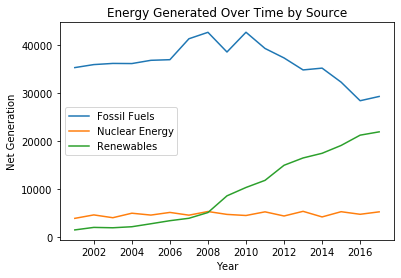

In [83]:
iowa.groupby('source').net_generation_x.plot()
plt.title('Energy Generated Over Time by Source')
plt.xlabel('Year')
plt.ylabel('Net Generation')
plt.legend()
plt.show()

## Exercise 3
Display the data as table where years are columns, and energy source is rows (Hint: df.pivot_table)

In [57]:
iowa_new = pd.pivot_table(iowa, values='net_generation_x', index=['source'], columns=['year'])

In [58]:
iowa_new

year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
source,,,,,,,,,,,,,,,,,
Fossil Fuels,35361,35991,36234,36205,36883,37014,41389,42734,38620,42750,39361,37379,34873,35250,32319,28437,29329
Nuclear Energy,3853,4574,3988,4929,4538,5095,4519,5282,4679,4451,5215,4347,5321,4152,5243,4703,5214
Renewables,1437,1963,1885,2102,2724,3364,3870,5070,8560,10308,11795,14949,16476,17452,19091,21241,21933


## Exercise 4
Make a line plot that shows the amount of energy generated over time. Each source should be a separate line?

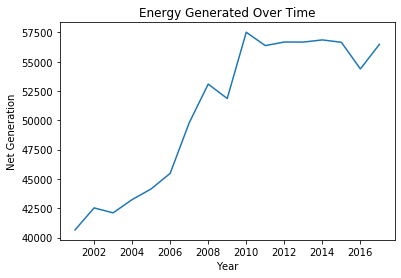

In [60]:
iowa.groupby([iowa.index]).net_generation_x.sum().plot()
plt.title('Energy Generated Over Time')
plt.xlabel('Year')
plt.ylabel('Net Generation')
plt.show()

## Exercise 5
Is the total generation increasing over time?

- From 2002 until 2010, energy generation was increasing over time but energy generation has stalled since then.

## Exercise 6
Use the sf_temps dataset
Create 4 categories for temperature, cold, cool, warm, hot (hint: use pd.cut or pd.qcut for this)

In [61]:
temps.describe()

,temp
count,8759.000000
mean,56.924112
std,6.107079
min,45.600000
25%,52.300000
50%,56.500000
75%,60.700000
max,72.200000


In [62]:
temps['weather'] = pd.qcut(temps['temp'], q=4, labels= ['cold', 'cool', 'warm', 'hot'])

## Exercise 7
How does the occurances of these 4 categories change month over month? i.e. how many days have each distinction? Visualize this and give the visual appropriate colors for each category.

In [63]:
temps.groupby([temps.index.month]).weather.value_counts()

date  weather
1     cold       561
      cool       183
2     cold       364
      cool       222
      warm        86
3     cold       297
      cool       235
      warm       198
      hot         13
4     cool       229
      cold       216
      warm       140
      hot        135
5     cool       319
      hot        241
      warm       132
      cold        52
6     hot        318
      cool       240
      warm       162
7     hot        372
      warm       272
      cool       100
8     hot        375
      warm       369
9     hot        363
      warm       350
      cool         7
10    hot        288
      warm       246
      cool       210
11    cool       277
      cold       191
      warm       182
      hot         70
12    cold       529
      cool       196
      warm        19
Name: weather, dtype: int64

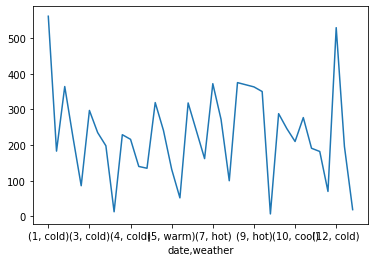

In [64]:
temps.groupby([temps.index.month]).weather.value_counts().plot()